In [1]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# x = [0,1, 2]
# y = [0,3, 2]

x = [1,3, 5, 7]
y = [2, 4, 6, 8]

f = interp1d(x,y)
y_hat = f(6)
print(y_hat)

7.0


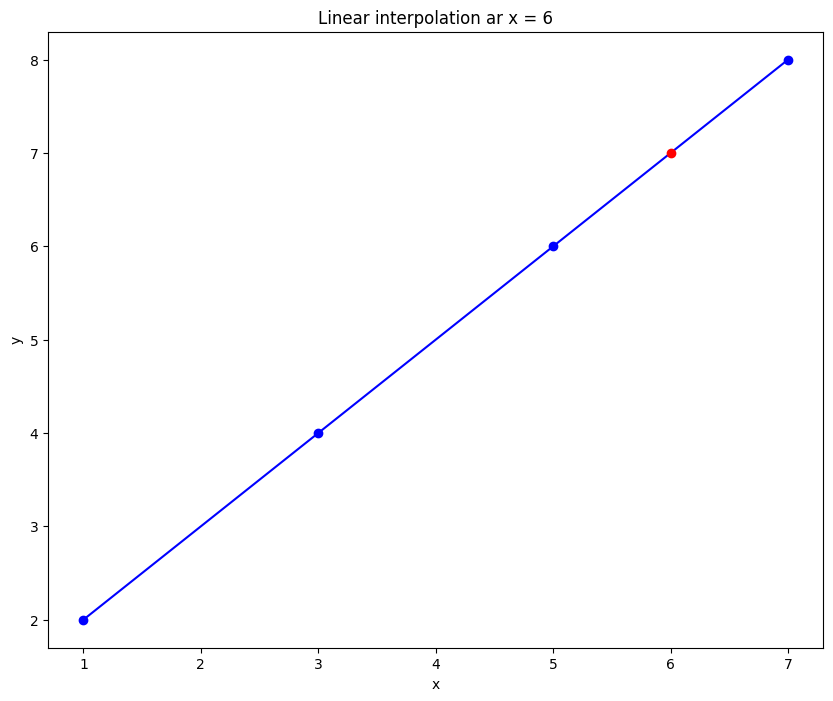

In [4]:
plt.figure(figsize=(10,8))
plt.plot(x,y,'-ob')
plt.plot(6,y_hat,'or')
plt.title('Linear interpolation ar x = 6')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
def divided_diff(x, y):
  n = len(y)
  coef = np.zeros([n, n])
  coef[:, 0] = y

  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = \
      (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
  return coef

def newton_poly(coef, x_data, x):
  n = len(x_data) - 1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k] + (x - x_data[n-k])*p
  return p




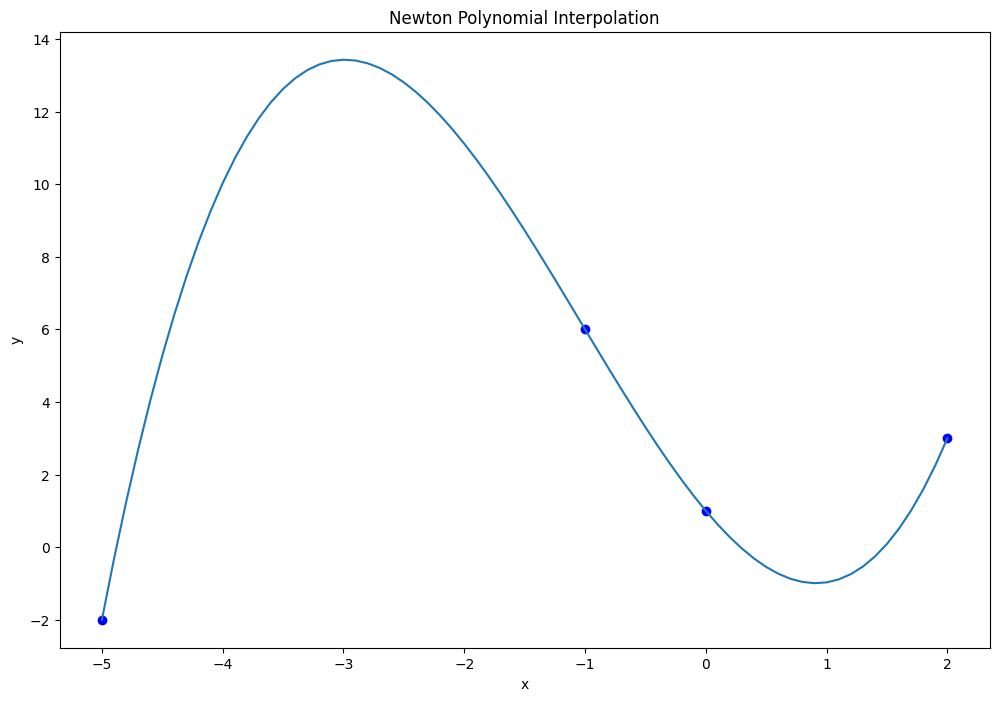

In [6]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])

a_s = divided_diff(x, y)[0, :]

x_new = np.arange(-5, 2.1, 0.1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize=(12,8))
plt.plot(x,y,'bo')
plt.plot(x_new, y_new)
plt.title('Newton Polynomial Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()